In [1]:
import tensorflow as tf
import tensorflow.contrib.keras.api.keras as K
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib.keras.api.keras.datasets import mnist


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# Step 1: Load dataset

(x_train, _), (x_test, _) = mnist.load_data()

H = 28
W = 28
C = 1

# convert to float32, with pixel values in the range [0-1]
x_train = x_train.reshape([x_train.shape[0], H, W, C]).astype(np.float32)
x_test = x_test.reshape([x_test.shape[0], H, W, C]).astype(np.float32)

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape, x_train.dtype)

(60000, 28, 28, 1) float32


In [25]:
# Step 2: Build a CNN autoencoder model

model = K.models.Sequential()

model.add(K.layers.Conv2D(input_shape = (x_train.shape[1:]), filters = 16, kernel_size = 3, padding = 'same', 
                          activation='relu'))

model.add(K.layers.MaxPooling2D(pool_size=2))

model.add(K.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))

model.add(K.layers.MaxPooling2D(pool_size=2))

model.add(K.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))

model.add(K.layers.MaxPooling2D(pool_size=2, padding = 'same'))

model.add(K.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))

model.add(K.layers.UpSampling2D(size=(4, 4)))

model.add(K.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'valid', activation = 'relu'))

model.add(K.layers.UpSampling2D(size=(2, 2)))

model.add(K.layers.Conv2D(filters = 1, kernel_size = 3, padding = 'same', activation = 'sigmoid'))

# Compile the model with 'binary_crossentropy' loss function and 'Adagrad' optimizer
model.compile(optimizer='Adagrad', loss='binary_crossentropy')

In [26]:
# Step 3: Train the model

model.fit(x_train, x_train, epochs=15, batch_size=100, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1844 - val_loss: 0.1522
Epoch 2/15
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1465 - val_loss: 0.1429
Epoch 3/15
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1378 - val_loss: 0.1343
Epoch 4/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1329 - val_loss: 0.1296
Epoch 5/15
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1296 - val_loss: 0.1287
Epoch 6/15
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1270 - val_loss: 0.1244
Epoch 7/15
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1248 - val_loss: 0.1235
Epoch 8/15
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1229 - val_loss: 0.1211
Epoch 9/15
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1214 - val_loss: 0.1196
Epoc

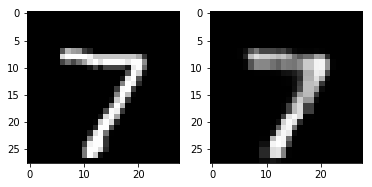

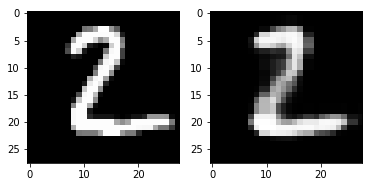

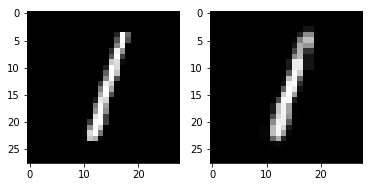

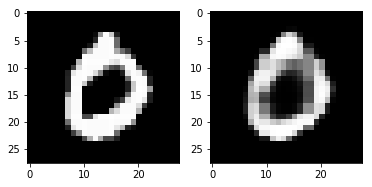

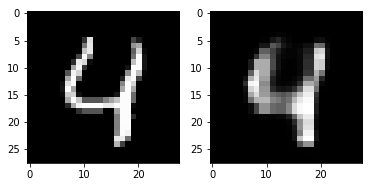

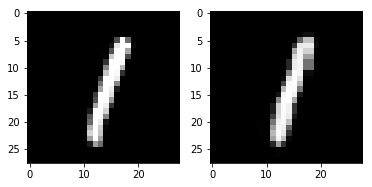

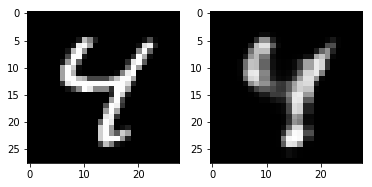

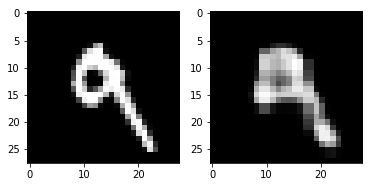

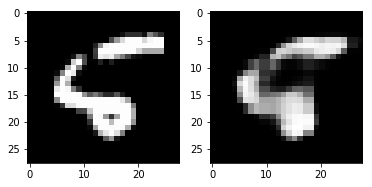

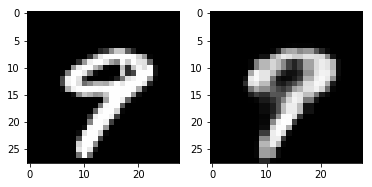

In [35]:
# Step 4: Evaluate the model

y_test = model.predict(x_test)

for idx in range(10):
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(x_test[idx, :, :, :]), cmap='gray')

    plt.subplot(1, 2, 2)
    plt.imshow(np.squeeze(y_test[idx, :, :, :]), cmap='gray')
    plt.show()